In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import weather_routing
import plot_isochron_routes
import pandas
import math
import traceback

In [53]:
year = 2023
##################
min_lat = 21.1
max_lat = 34.1
max_lng = -118
min_lng = -158
# Waypoints for the TransPac 
waypoints = pandas.DataFrame([
    (33.69853, -118.25085, 'Pt. Fermin Bouy'),
    (33.48177, -118.64101, 'Catalina West End'),
    (21.24296, -157.81775, 'Diamond Head Bouy'),
            ], columns=['lat', 'lng', 'name'])

# July 1st, 12:00 PST
Start_Date = f"{year}0701"
Start_Time = 19 #19:00 UTC
##################
wind_data_dir = f"historical_wind_data/{year}"
#wind_data_dir = f"/Volumes/Gribs/{year}"

In [54]:
waypoints

,lat,lng,name
0,33.69853,-118.25085,Pt. Fermin Bouy
1,33.48177,-118.64101,Catalina West End
2,21.24296,-157.81775,Diamond Head Bouy


In [55]:
waypoints2 = pandas.DataFrame([
    (33.69853, -118.25085, 'Pt. Fermin Bouy'),
    (33.48177, -118.64101, 'Catalina West End'),
    (27.85611111, -135.90111111, 'Mid-Pacific'),
    (21.24296, -157.81775, 'Diamond Head Bouy'),
            ], columns=['lat', 'lng', 'name'])

In [56]:
waypoints2

,lat,lng,name
0,33.698530,-118.250850,Pt. Fermin Bouy
1,33.481770,-118.641010,Catalina West End
2,27.856111,-135.901111,Mid-Pacific
3,21.242960,-157.817750,Diamond Head Bouy


In [57]:
import time
tic = time.time()
try:
    rhumb_route = weather_routing.route_shortest_path(waypoints2, hour_offset=0, start_date=Start_Date, start_time=Start_Time, 
                        wind_data_dir=wind_data_dir)
except Exception as e:
    print(f"Caught Exception {e}")
    traceback.print_exc()
print(f"finished in {time.time()-tic:.2f}s")

Pt. Fermin Bouy at 2023-07-01 11:00:00-07:00
starting time: 20230701 18 2023-07-01 11:00:00-07:00
0: twa=150 mag=237.3 dtg=21.2 sog=2.3
1: twa=165 mag=233.4 dtg=19.2 sog=2.0
2: twa=180 mag=234.6 dtg=17.3 sog=1.9
3: twa=165 mag=231.1 dtg=14.8 sog=2.5
4: twa=165 mag=242.3 dtg=11.9 sog=2.9
5: twa=165 mag=242.5 dtg=9.0 sog=2.9
6: twa=165 mag=234.8 dtg=6.2 sog=2.9
7: twa=165 mag=227.8 dtg=3.8 sog=2.4
8: twa=165 mag=238.3 dtg=1.7 sog=2.1
9: twa=150 mag=239.2 dtg=1.6 sog=3.3
Catalina West End at 2023-07-01 21:00:00-07:00
starting time: 20230701 18 2023-07-01 21:00:00-07:00
10: twa=180 mag=254.0 dtg=947.5 sog=2.6
11: twa=165 mag=247.6 dtg=944.6 sog=2.9
12: twa=165 mag=255.6 dtg=941.8 sog=2.9
13: twa=165 mag=251.0 dtg=938.9 sog=2.9
14: twa=165 mag=247.5 dtg=936.0 sog=2.9
15: twa=165 mag=246.9 dtg=933.6 sog=2.4
16: twa=165 mag=251.4 dtg=931.4 sog=2.2
17: twa=165 mag=251.3 dtg=929.4 sog=2.0
18: twa=165 mag=246.9 dtg=927.6 sog=1.8
19: twa=150 mag=249.2 dtg=925.6 sog=2.0
20: twa=135 mag=254.3 dtg=9

Traceback (most recent call last):
  File "/Users/bdrawert/Desktop/research/weather_routing/weather_routing.py", line 533, in simulate_shortest_path
    wind_data = load_historical_gfs_forecast(wind_data_dir, grib_file_date,
                                              grib_file_time, hr_offset)
  File "/Users/bdrawert/Desktop/research/weather_routing/weather_routing.py", line 701, in load_historical_gfs_forecast
    raise Exception(f"PKL file not found:'{pkl_file}''.\nGRIB file not found: '{grib_file}'")
Exception: PKL file not found:'historical_wind_data/2023/20230730-00-gfs.0p25.f000.pkl''.
GRIB file not found: 'historical_wind_data/2023/20230730-00-gfs.t00z.pgrb2.0p25.f000'


In [58]:
rhumb_route

,lat,lng,date,twa,tws,mag,dtg,sog,dev_angle,hovertext
0,33.698530,-118.250850,2023-07-01 11:00:00-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.678154,-118.288911,2023-07-01 12:00:00-07:00,150.0,3.932191,237.253644,21.194710,2.261010,0.846269,0: twa/s=150/4 mag=237 sog=2.3
2,33.658339,-118.320902,2023-07-01 13:00:00-07:00,165.0,4.122851,233.350587,19.204904,1.992711,2.945403,1: twa/s=165/4 mag=233 sog=2.0
3,33.639551,-118.352629,2023-07-01 14:00:00-07:00,180.0,4.473562,234.581933,17.260226,1.946000,2.001802,2: twa/s=180/4 mag=235 sog=1.9
4,33.613375,-118.391617,2023-07-01 15:00:00-07:00,165.0,5.180372,231.131624,14.770652,2.503846,5.660175,3: twa/s=165/5 mag=231 sog=2.5
...,...,...,...,...,...,...,...,...,...,...
674,22.025382,-155.738636,2023-07-29 13:00:00-07:00,150.0,1.694440,241.113784,125.183965,0.974303,7.181679,673: twa/s=150/2 mag=241 sog=1.0
675,22.021625,-155.750500,2023-07-29 14:00:00-07:00,150.0,1.213618,251.147477,124.486973,0.697831,2.802040,674: twa/s=150/1 mag=251 sog=0.7
676,22.014751,-155.773073,2023-07-29 15:00:00-07:00,110.0,1.333583,251.819054,123.166988,1.322470,3.493759,675: twa/s=110/1 mag=252 sog=1.3
677,22.010295,-155.787160,2023-07-29 16:00:00-07:00,120.0,0.884581,251.164087,122.339488,0.828558,2.884728,676: twa/s=120/1 mag=251 sog=0.8


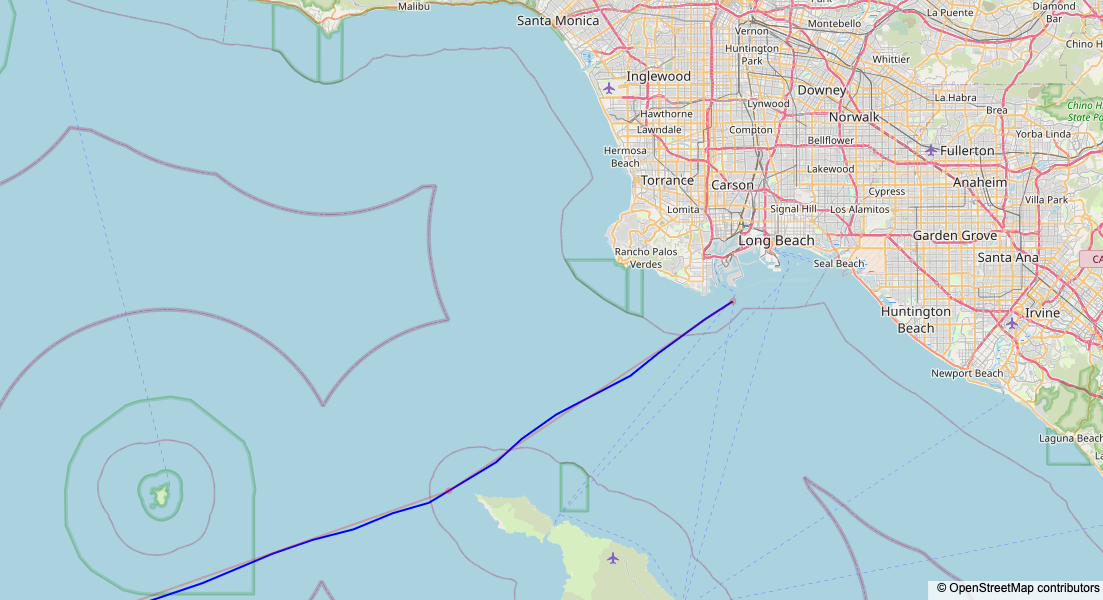

In [59]:
plot_isochron_routes.plot_isochron_routes(rhumb_route=rhumb_route, waypoints=waypoints)

In [ ]:
?plot_isochron_routes.plot_isochron_routes

In [ ]:
waypoints['lat']

In [ ]:
tic = time.time()
try:
    isochrons = weather_routing.route_isochrons(waypoints,start_date=Start_Date, start_time=Start_Time, wind_data_dir=wind_data_dir)
except Exception as e:
    print(e)
print(f"finished in {time.time()-tic:.2f}s")

In [ ]:
#plot_isochron_routes.plot_isochron_routes(isochrons=isochrons, waypoints=waypoints, min_route=isochrons[-1][0])
plot_isochron_routes.plot_isochron_routes(min_route=isochrons[-1][0])

In [ ]:
plot_isochron_routes.plot_isochron_routes(isochrons=isochrons[-3:-1])


In [ ]:
plot_isochron_routes.plot_isochron_routes(isochrons=isochrons[2:4], waypoints=waypoints)